## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? 

Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? 

(or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)

In [1]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
import os
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/clayton/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [2]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

# print allmales['all']['Total with Income']

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)


## exploratory phase

In [3]:
#lest see what is in the data
from pandas.tools.plotting import scatter_matrix
#scatter_matrix(allmales)

#like for the building homework: this fails cause the data is not parsed and formatted propoerly
#so maybe just print the columns to find out
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [4]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

    

/home/clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot


In [5]:
#do the same for females
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/home/clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
#double check data lengths are the same

for eth in ['white', 'black', 'hispanic', 'asian']:
    print len(allmales[eth]['Median income']) == len(allfemales[eth]['Median income'])

True
True
True
True


#### to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

#### also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

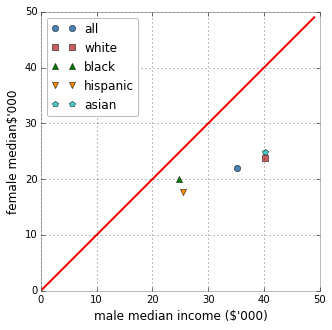

In [7]:
x = range(50)
y = range(50)
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(x, y, 'r-', lw=2)
ax.plot(allmales['all']['Median income'][1]/1000, allfemales['all']['Median income'][1]/1000, 'o', label='all')
ax.plot(allmales['white']['Median income'][1]/1000, allfemales['white']['Median income'][1]/1000, 's', label='white')
ax.plot(allmales['black']['Median income'][1]/1000, allfemales['black']['Median income'][1]/1000, '^', label='black')
ax.plot(allmales['hispanic']['Median income'][1]/1000, allfemales['hispanic']['Median income'][1]/1000, 'v', label='hispanic')
ax.plot(allmales['asian']['Median income'][1]/1000, allfemales['asian']['Median income'][1]/1000, 'p', label='asian')
ax.set_xlabel('male median income ($\'000)')
ax.set_ylabel('female median$\'000')
ax.set_xlim([0,50])
ax.set_ylim([0,50])
ax.legend(loc='best')

> All the points are below the 1:1 line, showing that for all total median income values males make more than females

### Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
maleMedians = np.array([allmales['white']['Median income'][1], allmales['black']['Median income'][1],
              allmales['hispanic']['Median income'][1], allmales['asian']['Median income'][1]])
femaleMedians = np.array([allfemales['white']['Median income'][1], allfemales['black']['Median income'][1],
              allfemales['hispanic']['Median income'][1], allfemales['asian']['Median income'][1]])
print maleMedians
print femaleMedians

[ 40122.  24855.  25411.  40153.]
[ 23780.  20044.  17762.  24840.]


In [9]:
maleMediansOLS = sm.add_constant(maleMedians)
model = sm.OLS(femaleMedians, maleMediansOLS).fit()
model.params

array([  9.94371985e+03,   3.57367575e-01])

In [10]:
pltmale = maleMedians/1000
pltfemale = (model.params[0] + model.params[1]*maleMedians)/1000
print pltmale, pltfemale

[ 40.122  24.855  25.411  40.153] [ 24.28202169  18.82609093  19.0247873   24.29310009]


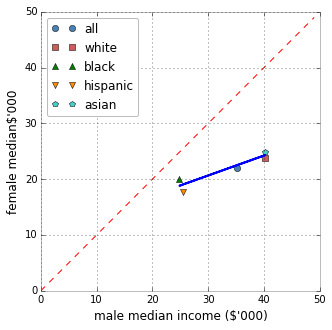

In [11]:
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(x, y, 'r--', lw=1)
ax.plot(allmales['all']['Median income'][1]/1000, allfemales['all']['Median income'][1]/1000, 'o', label='all')
ax.plot(allmales['white']['Median income'][1]/1000, allfemales['white']['Median income'][1]/1000, 's', label='white')
ax.plot(allmales['black']['Median income'][1]/1000, allfemales['black']['Median income'][1]/1000, '^', label='black')
ax.plot(allmales['hispanic']['Median income'][1]/1000, allfemales['hispanic']['Median income'][1]/1000, 'v', label='hispanic')
ax.plot(allmales['asian']['Median income'][1]/1000, allfemales['asian']['Median income'][1]/1000, 'p', label='asian')
ax.plot(pltmale, pltfemale, '-', color='blue', lw=2)
ax.set_xlabel('male median income ($\'000)')
ax.set_ylabel('female median$\'000')
ax.set_xlim([0,50])
ax.set_ylim([0,50])
ax.legend(loc='best')

##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [12]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
from scipy import stats
#cor = stats.spearmanr(all_males, all_females)
#all_males.std()/all_females.std()
#beta1=cor[0]*all_females.std()/all_males.std()
#beta0=all_females.mean()-beta1*all_males.mean()

##this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis
> what?

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [13]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [14]:
## set up the dataframe (if this is what that question meant.)
# create master df
df = pd.DataFrame({'maleVal': allmales['white']['Median income'], 'femaleVal': allfemales['white']['Median income']})
ethn = ["white" for x in range(len(allmales['white']['Median income']))]
df['ethnicity'] = ethn
# add each ethnicity and gender
dfadd = pd.DataFrame({'maleVal': allmales['black']['Median income'], 'femaleVal': allfemales['black']['Median income']})
ethn = ["black" for x in range(len(allmales['black']['Median income']))]
dfadd['ethnicity'] = ethn
df = df.append(dfadd)
dfadd = pd.DataFrame({'maleVal': allmales['asian']['Median income'], 'femaleVal': allfemales['asian']['Median income']})
ethn = ["asian" for x in range(len(allmales['asian']['Median income']))]
dfadd['ethnicity'] = ethn
df = df.append(dfadd)
dfadd = pd.DataFrame({'maleVal': allmales['hispanic']['Median income'], 'femaleVal': allfemales['hispanic']['Median income']})
ethn = ["hispanic" for x in range(len(allmales['hispanic']['Median income']))]
dfadd['ethnicity'] = ethn
df = df.append(dfadd)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 48
Data columns (total 3 columns):
femaleVal    140 non-null float64
maleVal      138 non-null float64
ethnicity    196 non-null object
dtypes: float64(2), object(1)
memory usage: 6.1+ KB


,femaleVal,maleVal,ethnicity
0,NaN,NaN,white
1,23780,40122,white
2,30626,44882,white
3,30919,45554,white
4,10328,20445,white
5,1645,3737,white
6,12038,16625,white
7,7812,8381,white
8,2205,1662,white
9,12827,10759,white


(0, 50)

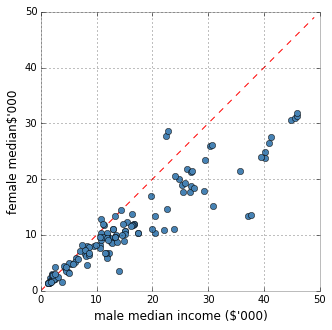

In [16]:
# plot male v female median incomes with the 1:1 line
x = range(50)
y = range(50)
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(x, y, 'r--', lw=1)
ax.plot(df.maleVal/1000, df.femaleVal/1000, 'o')
ax.set_xlabel('male median income ($\'000)')
ax.set_ylabel('female median$\'000')
ax.set_xlim([0,50])
ax.set_ylim([0,50])
#pl.plot(np.linspace(0, 40, 1), np.linspace(0, 40, 1))

In [17]:
# fit
mod = smf.ols(formula='femaleVal ~ maleVal', data=df).fit()

print mod.summary()

                            OLS Regression Results                            
Dep. Variable:              femaleVal   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     831.6
Date:                Sun, 18 Oct 2015   Prob (F-statistic):           1.38e-58
Time:                        14:37:00   Log-Likelihood:                -1247.4
No. Observations:                 133   AIC:                             2499.
Df Residuals:                     131   BIC:                             2505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1506.5554    404.504      3.724      0.0

In [18]:
print mod.params

Intercept    1506.555414
maleVal         0.624491
dtype: float64


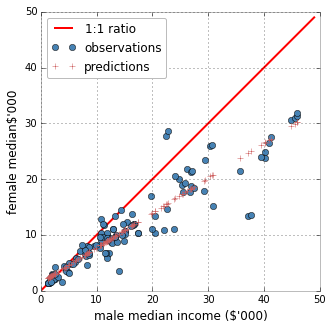

In [19]:
# plot prediction
ypred = mod.params[0] + mod.params[1]*df.maleVal
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(x, y, 'r-', lw=2, label='1:1 ratio')
ax.plot(df.maleVal/1000, df.femaleVal/1000, 'o', label='observations')
ax.plot(df.maleVal/1000, ypred/1000, '+', label='predictions')
ax.set_xlabel('male median income ($\'000)')
ax.set_ylabel('female median$\'000')
ax.legend(loc="best")

In [26]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
from scipy import stats
cor = stats.spearmanr(all_males, all_females)
all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()
print cor, beta0, beta1 #{1:.2f}
print
print 'Federica\'s regression results: const={0:.2f} coef={1:.4f}'.format(beta0, beta1)
print 'statsmodel regression results: const={0:.2f} coef={1:.4f}'.format(mod.params[0], mod.params[1])

(0.8518773820833847, 3.3344848041908966e-70) 2231.077597 0.559672467818

Federica's regression results: const=2231.08 coef=0.5597
statsmodel regression results: const=1506.56 coef=0.6245


##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

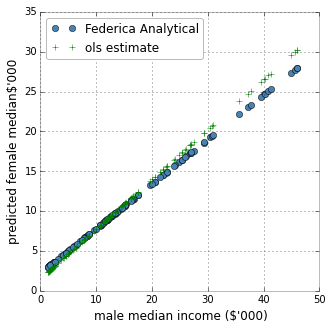

In [27]:
federica_est = beta0 + beta1*df.maleVal
# model estimate = ypred from above
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(df.maleVal/1000, federica_est/1000, 'o', label='Federica Analytical')
ax.plot(df.maleVal/1000, ypred/1000, '+', color='green', label='ols estimate')
ax.set_xlabel('male median income ($\'000)')
ax.set_ylabel('predicted female median$\'000')
ax.legend(loc='best')

In [40]:
#is the line fit similar? can you find any high legverage points?

Yes the line is very similar, although Federica's analytical example seems to slightly overestimate female income at low values and underestimate at high values as compared to the OLS regression

In [28]:
## include ethnicity in regression
import statsmodels.formula.api as smf
mod_eth = smf.ols(formula='femaleVal ~ maleVal + C(ethnicity)', data=df).fit()
print mod_eth.summary()

                            OLS Regression Results                            
Dep. Variable:              femaleVal   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     250.4
Date:                Sun, 18 Oct 2015   Prob (F-statistic):           1.74e-59
Time:                        14:43:12   Log-Likelihood:                -1235.2
No. Observations:                 133   AIC:                             2480.
Df Residuals:                     128   BIC:                             2495.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

at first seem like conterintuitive results, but it's a product of comparing women's to men's income and how much more white and asian men make in comparison to black and hispanic men

In [33]:
mod_eth.params, mod_eth.params[3]

(Intercept                   1759.526361
 C(ethnicity)[T.black]       1306.004489
 C(ethnicity)[T.hispanic]    -733.422289
 C(ethnicity)[T.white]      -1717.823258
 maleVal                        0.635004
 dtype: float64, -1717.8232582892549)

In [36]:
# get predicted values
white_pred = (mod_eth.params[0] + mod_eth.params[3] + mod_eth.params[4]*df.maleVal[df.ethnicity=='white'])/1000
black_pred = (mod_eth.params[0] + mod_eth.params[1] + mod_eth.params[4]*df.maleVal[df.ethnicity=='black'])/1000
hisp_pred = (mod_eth.params[0] + mod_eth.params[2] + mod_eth.params[4]*df.maleVal[df.ethnicity=='hispanic'])/1000
asian_pred = (mod_eth.params[0] + mod_eth.params[4]*df.maleVal[df.ethnicity=='asian'])/1000

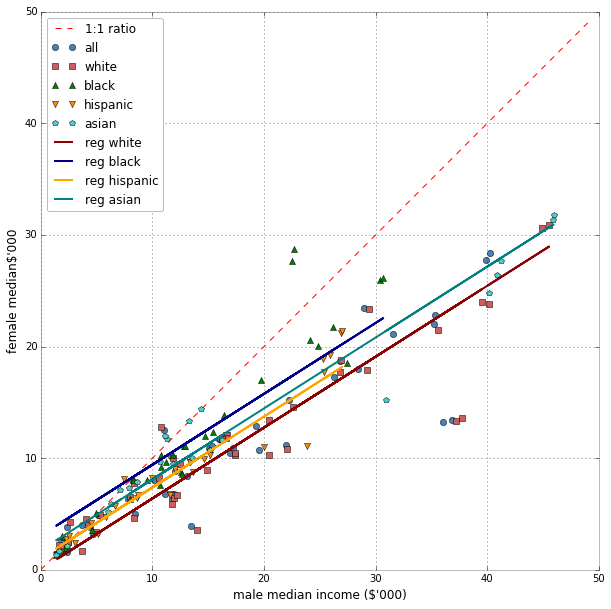

In [38]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(x, y, 'r--', lw=1, label="1:1 ratio")
ax.plot(allmales['all']['Median income']/1000, allfemales['all']['Median income']/1000, 'o', label='all')
ax.plot(allmales['white']['Median income']/1000, allfemales['white']['Median income']/1000, 's', label='white')
ax.plot(allmales['black']['Median income']/1000, allfemales['black']['Median income']/1000, '^', label='black')
ax.plot(allmales['hispanic']['Median income']/1000, allfemales['hispanic']['Median income']/1000, 'v', label='hispanic')
ax.plot(allmales['asian']['Median income']/1000, allfemales['asian']['Median income']/1000, 'p', label='asian')
ax.plot(allmales['white']['Median income']/1000, white_pred, '-', color="darkred", label='reg white')
ax.plot(allmales['black']['Median income']/1000, black_pred, '-', color="darkblue", label='reg black')
ax.plot(allmales['hispanic']['Median income']/1000, hisp_pred, '-', color="orange", label='reg hispanic')
ax.plot(allmales['asian']['Median income']/1000, asian_pred, '-', color="teal", label='reg asian')
# ax.plot(pltmale, pltfemale, '-', color='blue', lw=2)
ax.set_xlabel('male median income ($\'000)')
ax.set_ylabel('female median$\'000')
ax.set_xlim([0,50])
ax.set_ylim([0,50])
ax.legend(loc='best')

Slope:  0.59, 0.59, 0.59 0.56


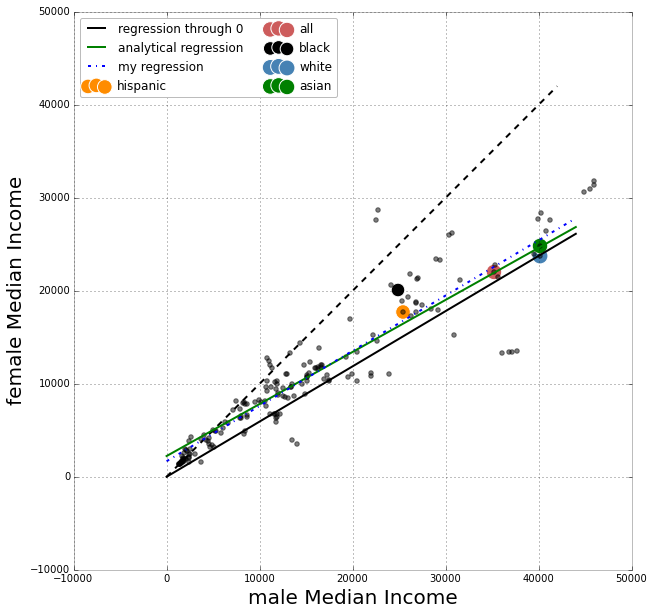

##Now pick a stipend, maybe your ideal stipend? 
##and predict what a woman in a position where a man recieves your ideal stipend would make



##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)